# Week 3 Pre-Class Assessment

## Part I: Confidence Intervals using UTSC Weather Station Data

Building on what we covered in Week 2's pre-class assessment, we will continue our examination of the hourly surface pressure data from the UTSC Weather Station. First, we import the packages that we will need:

In [2]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16) #set default font size and weight for plots

Next, we load the hourly UTSC Weather Station surface pressure data from 2015-2018.

In [3]:
# Load data:
# UTSC surface pressure data for the years 2015-2018 in kPa. 
# Data are collected hourly.
filename = 'UTSC_P_20152018.csv'
PS = np.genfromtxt(filename, delimiter = ',')

Recall that the mean of our data is:

In [4]:
avg_PS = np.mean(PS)
print(avg_PS)

101.52784200385355


Now, let's calculate the 95% confidence intervals on this mean. 

First, we need to calculate the sample standard deviation. We can do this using the np.std() function, but we need to specify the change to our degrees of freedom. 

The `np.std()` function assumes that the number of degrees of freedom (dof) is simple the sample size, $N$. However, for the sample standard deviation our dof is $N$-1 because we have used up one dof estimating the sample mean.

In [5]:
# Calculate the sample standard deviation
# Use np.std(PS,ddof=?), where ddof = "delta degrees of freedom", 
# such that dof = N - ddof

s_PS = np.std(PS,ddof = 1)
print(s_PS)

0.7995947700967082


Note how similar the sample standard deviation is to the standard deviation we calculated last week. Why?

Now, we need to calculate the test statistic that we will use to compute the 95% confidence intervals (two-sided), assuming a certain sample distribution. 

To calculate test statistics we need to import an extra python package:

In [6]:
import scipy.stats as stats

Do we use a normal or z-distribution or a t-distribution? 

Note the corresponding scipy.stats functions are stats.norm.ppf() or stats.t.ppf().

Compare the confidence intervals for both the z- and t- test statistics. Are they similar or different? Why?

In [14]:
# Calculate z-statistic
# Enter the probability that you are interest in 
#  (in fraction, not percent)

z_stat = stats.norm.ppf(0.975)
print(z_stat)

1.959963984540054


Use your probability tables to check that this is correct.

In [15]:
# Calculate t-statistic

# Enter the probability that you are interest in 
#  (in fraction, not percent). 
# What other key piece of information do you have to provide to 
#  this function?

t_stat = stats.t.ppf(0.975,len(PS)-1)     
print(t_stat)    

1.96003324427304


In [16]:
# Calculate upper and lower confidence intervals using the z-statistic

Upper_CI_z = avg_PS + z_stat*np.std(PS)/np.sqrt(len(PS))
Lower_CI_z = avg_PS - z_stat*np.std(PS)/np.sqrt(len(PS))

In [17]:
print(Upper_CI_z,Lower_CI_z)

101.53630952031811 101.51937448738899


In [18]:
# Repeat using the t_statistic

Upper_CI_t = avg_PS + t_stat*s_PS/np.sqrt(len(PS)-1)
Lower_CI_t = avg_PS - t_stat*s_PS/np.sqrt(len(PS)-1)

In [19]:
print(Upper_CI_t,Lower_CI_t)

101.53631006675067 101.51937394095643


Let's plot a histogram. Add the mean, $\pm$ the standard deviation and the upper and lower confidence intervals (computed using the t-statistic) as vertical lines.

Text(0.5,0,'Surface Pressure (kPa)')

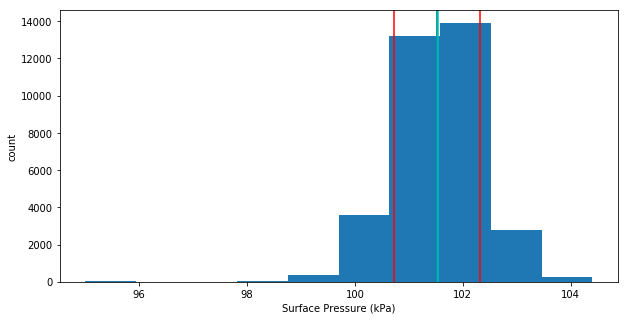

In [57]:
# plot histogram
plt.figure(figsize=(10,5))

plt.hist(PS)
plt.axvline(avg_PS,color='k') # add mean
plt.axvline(avg_PS+s_PS,color='r') # add +1 std
plt.axvline(avg_PS-s_PS,color='r') # add -1 std
plt.axvline(Upper_CI_t,color='c') # add upper CI
plt.axvline(Lower_CI_t,color='c') # add lower CI
plt.ylabel("count")
plt.xlabel("Surface Pressure (kPa)")

**Reflection Question:**\
Why are the confidence intervals so much smaller than the standard deviation?

## Part II: Simple Regression

In Week 3, we will discuss linear regression. As an introduction, let's take a quick look at preparing data for regression analysis.

To begin, let's load in some data. Here we will examine the relationship between globally-averaged temperature anomalies and CO2 concentration. These are data from 1979-2010

In [38]:
filename = "witt.csv"
data = np.genfromtxt(filename, dtype='str',delimiter = ',').T #  I just transposed it so that we can get each data component as it's own array
data = data.astype('float')

In [39]:
#  GISTEMP temperature anomalies in 100th's of degrees C
T = data[1]
print(T)

[ 8. 19. 26.  4. 25.  9.  4. 12. 27. 31. 19. 36. 35. 13. 13. 23. 37. 29.
 39. 56. 31. 33. 47. 56. 55. 48. 63. 55. 58. 44. 57. 63.]


In [40]:
#  CO2 concentrations (in ppm)
CO2 = data[2]
print(CO2)

[336.67 338.57 339.92 341.3  342.71 344.24 345.81 347.11 348.72 351.04
 352.68 353.97 355.37 356.18 356.69 358.14 360.02 361.95 363.18 365.19
 367.86 368.83 370.43 372.01 374.45 376.77 378.3  380.83 382.56 384.39
 386.34 388.13]


Now, let's plot the data in a scatter plot to see if there appears to be a linear relationship between the two variables. 

It doesn't really matter which variable we choose to be on the x-axis or the y-axis when we initially plot our data, but how we build our regression model will depend on the hypothesis we're testing about the relationship between the two variables, i.e. which variable is the predictor and which is the predictand.

So, what do you think is a reasonable hypothesis? Which would you select as the predictor and which as the predictand based on this hypothesis?

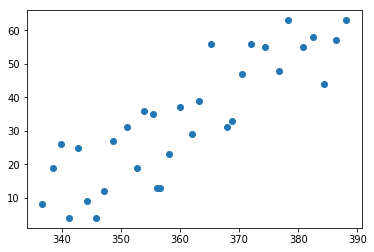

In [41]:
#  Plot the data using plt.scatter(). Google this to see how to use it.
plt.scatter(CO2,T)

We will discuss in lecture how to compute the slope and intercept of the best fit line, but for now, we will simply use the python tools to help us.

In [42]:
# Compute the regression coefficients using np.polyfit() 
#  (take a look back at the section on resampling in the courseware)

a = np.polyfit(CO2,T,1)

In [43]:
print(a)

[   1.03017057 -338.24503002]


There should be two values for a, one is the slope and one is the intercept - which is which?

Now we can use the slope and intercept to compute our best-fit line.

In [26]:
# Compute the best-fit line (use y = slope*x + intercept)

y_fit = a[0]*CO2 + a[1]

Add this line to the scatter plot. 

Be sure to now choose your x- and y-axes based on a hypothesis about the relationship between the data. 

Properly label your plot and save it as a .png file.

Text(0.5,1,'Temperature versus CO$_2$ (1979-2010)')

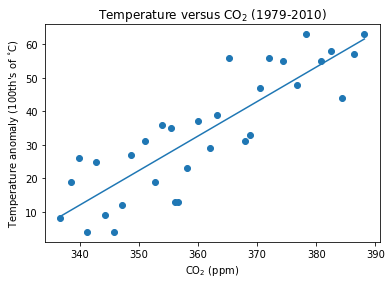

In [49]:
# Replot the scatter plot and add the best-fit line.

plt.scatter(CO2,T)
plt.plot(CO2,y_fit)
plt.savefig("co2_T_fit.png")
plt.xlabel("CO$_{2}$ (ppm)")
plt.ylabel("Temperature anomaly (100th's of $^{\circ}$C)")
plt.title("Temperature versus CO$_2$ (1979-2010)")